In [1]:
# decision tree is useful for both classification and regression 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
url  = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df = df[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
df.dropna(inplace=True)

In [5]:
df["Sex"] = df["Sex"].map({"male":0, "female":1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C":1, "Q":2})
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=42)
model = DecisionTreeClassifier(max_depth =4, random_state=42)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6962616822429907

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75       122
           1       0.67      0.59      0.62        92

    accuracy                           0.70       214
   macro avg       0.69      0.68      0.68       214
weighted avg       0.69      0.70      0.69       214



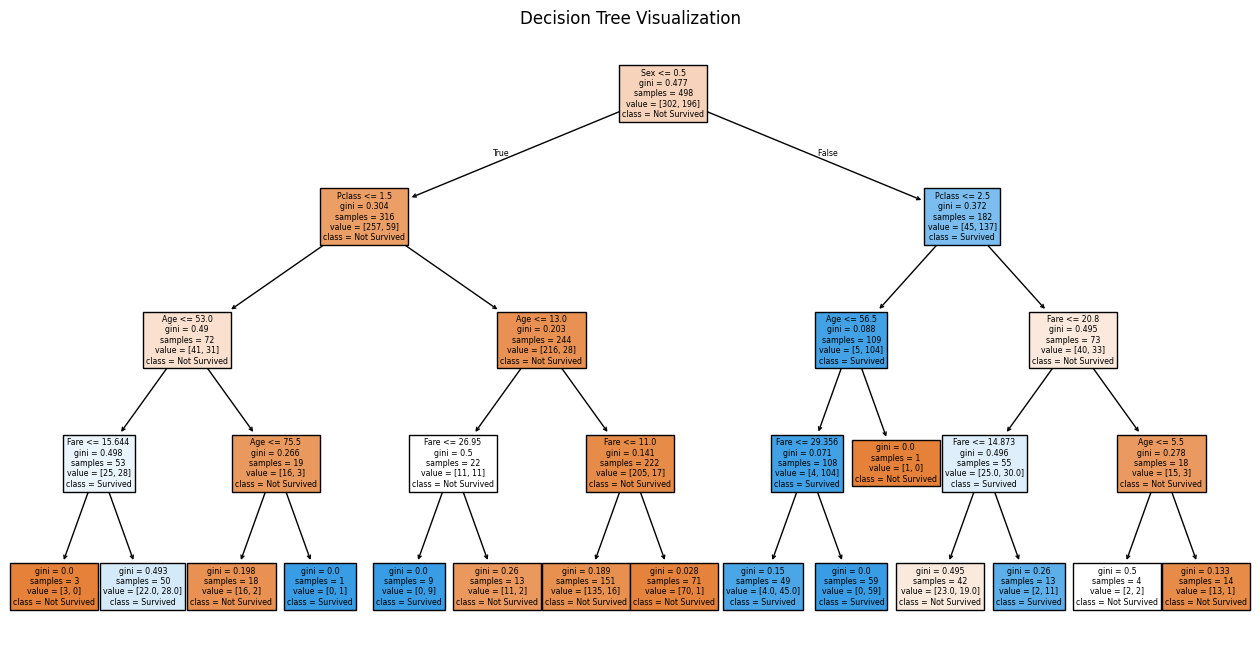

In [9]:
plt.figure(figsize=(16, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# When interpretability is important or non-linear decision boundaries are needed